# CAP5610 - HW 1

In HW1, you will explore and compare Feature Extraction and Feature Selection using a high-
dimensional biological dataset. The goal is to implement Autoencoder (feature extraction) and
Concrete Autoencoder (feature selection), visualize and analyze results, and present your findings
in a structured report.
## Data:
• Gene Expression: lncRNA_5_Cancers.csv
• Cancer Types: KIRC, LUAD, LUSC, PRAD, THCA
• Features: 12,309 lncRNAs
## Tasks:
### Task 1: [25 points] Explore the Data
Load the provided dataset and see how many data points and features it has. Count how many
samples belong to each type of cancer and make a simple bar chart.
### Task 2: [25 points] Classification Using All Features Employing SVM
Use those ~12K features to train an SVM with RBF kernel. Report (i) confusion matrix for one
fold, (ii) the macro, micro, and weighted precision/recall/F1 along with the accuracy, (iii) plot
AUC-ROC and AUC-PR curve. Use 5-flod cross-validation.
### Task 3: [25 points] Autoencoder for Feature Extraction
Train an Autoencoder that reduces the features to 50 latent dimensions. Use those 50 features
to train an SVM with RBF kernel. Report (i) confusion matrix for one fold, (ii) the macro, micro,
and weighted precision/recall/F1 along with the accuracy, (iii) plot AUC-ROC and AUC-PR
curve.
### Task 4: [25 points] Concrete Autoencoder for Feature Selection
Train a Concrete Autoencoder to select 50 actual features. Train an SVM with RBF kernel on
those 50 selected features. Report (i) confusion matrix for one fold, (ii) the macro, micro, and
weighted precision/recall/F1 along with the accuracy, (iii) plot AUC-ROC and AUC-PR curve.
## Hint:
• Autoencoder: You can implement a simple Autoencoder using libraries like
Keras/TensorFlow or PyTorch.
• Concrete Autoencoder: Use the concrete-autoencoder library for this task. It requires
TensorFlow 2.12.*. Install it using:
pip install tensorflow==2.12.0 concrete-autoencoder
• SVM: Use the following for reproducibility:
svm = SVC(kernel="rbf", probability=True, random_state=42)
## Submission:
You must submit the following items in CANVAS:
• Report (MS word or PDF)
o Describe the algorithms/approaches/tools used: (a) What it is or What it does, (b) How
it does, and (c) Application.
o Describe results: (a) Put Figure/Table number and Title: On top of the table, and bottom
of the figure. (b) Describe the figure and table. (c) Your observation about the figure
and table. (d) Conclusion.
• Source code (*.py or Jupyter notebook)
o Must be well organized (comments, indentation, ...)
• File name: HW1_lastName
You must submit the files SEPERATELY. DO NOT compress into a ZIP file. If you fail to
provide all required information or files, you may be given zero score without grading.
## Deadline:
The deadline is 11:59pm Wednesday, September 10, 2025. Late assignments will not be accepted.

## TASK 1
### Loading Data

In [28]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt

# Loading Data
os.chdir("../data")
#print(os.getcwd())

data_file_name = "lncRNA_5_Cancers.csv"
data_path = os.path.join(os.getcwd(),data_file_name)

data = pd.read_csv(data_path)
#print(data)

# Returning to working dir
os.chdir("../notebooks")

Now with the data loaded. Getting a sense of the data shape:

Class
KIRC    527
LUAD    510
THCA    501
LUSC    498
PRAD    493
Name: count, dtype: int64
Total number of data points: 2529.
Total number of features: 12311


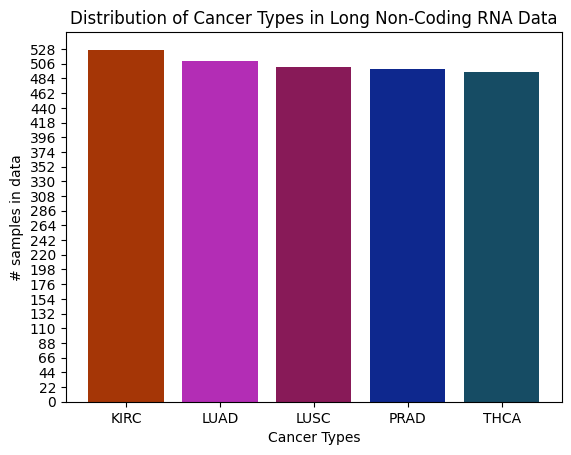

In [43]:

# Counting each cancer type
cancer_type_counts = data['Class'].value_counts()
print(cancer_type_counts)
print(f"Total number of data points: {data.shape[0]}.\nTotal number of features: {data.shape[1]}",)

# Creating bar chart 
plt.bar(data['Class'].unique().tolist(),cancer_type_counts,color=['#a53606', '#b32db5', '#881a58', '#0e288e', '#164c64'])
plt.xlabel("Cancer Types")
plt.ylabel("# samples in data")
plt.title("Distribution of Cancer Types in Long Non-Coding RNA Data")
plt.yticks([x for x in range(0,550,22)])
plt.show()
